# Assignment 5 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [38]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------

from sklearn.feature_selection import SelectKBest, chi2 ,mutual_info_classif
from sklearn.svm import SVC 
from numpy import mean ,std
from sklearn.model_selection import  cross_validate ,RepeatedKFold , RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.ensemble import StackingClassifier ,AdaBoostClassifier , BaggingClassifier

# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [39]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [40]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [41]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [42]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [43]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht # Tokenization: The process of breaking up a text into individual words or tokens

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [44]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, encoding='utf-8')
df_test  = pd.read_csv(test_filename, encoding='utf-8')

In [45]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [46]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

In [47]:
df_train['gender'].value_counts()

m    575
f    178
Name: gender, dtype: int64

### Your implementation:
Write your code solution in the following code-cells

In [48]:
def clean_text(text):
    # Replace any digits with an empty string
    text = re.sub(r'\d+', '', text)
    
    # Replace any non-word characters or whitespace with an empty string
    text = re.sub(r'[^\w\s]', '', text)
    
    # Replace any sequence of whitespace characters with a single space
    text = re.sub(r'\s+', ' ', text)
    
    # Remove any whitespace at the beginning or end of the string
    text = text.strip()
    
    # Return the cleaned text
    return text


In [49]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

1. Which models we have learned?
2. What params will fit better?
3. Change funtions and names.
4. try countVectorizer and tfidf
5. Explanations for each code
6. Summerize in a read me file
7. github and youtube upload
8. make sure i did everything and know everything

We will start by defining which models for classification will be used for machine learning 

In [50]:
# models:
models_list = {'lr': LogisticRegression(),
                'knn': KNeighborsClassifier(),
                'cart': DecisionTreeClassifier(),
                'svm': SVC(),
                'LinearSVC':LinearSVC(),
                'MLPClassifier':MLPClassifier(),
                'Perceptron':Perceptron(),
                'SGDClassifier':SGDClassifier()
                }

Firstly, we will create a dictionary called 'hyperparameters' that contains hyperparameters for several machine learning models that will be trained and evaluated later on.

Each model has its own set of hyperparameters, which are defined as a dictionary within the params dictionary.

In [51]:
#  Parameters for the configuration of the models:
hyperparameters = {'lr': { 'C': [0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'] },
                    'knn': { 'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15] , 'weights': ['uniform', 'distance'] },
                    'cart': { 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8] },
                    'svm': {'C': [0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] },
                    'LinearSVC': { 'C': [0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'dual': [False] },
                    'MLPClassifier': { 'hidden_layer_sizes': [(10,), (50,), (100,)], 'activation': ['relu', 'tanh', 'logistic'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'learning_rate': ['constant', 'adaptive'] },
                    'Perceptron': { 'penalty': ['l1', 'l2', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1] },
                    'SGDClassifier': { 'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'], 'penalty': ['l1', 'l2', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1] } 
                    }

Now i made a function that used to preprocess and split the annotated corpus for training a machine learning model, that way it will be easier to make changes and try to improve our model.

The function first reads the annotated corpus from a CSV file (annotated_corpus_for_train.csv) and then applies a cleaning function (clean_text) to the 'story' column of the dataframe. Then, it uses the train_test_split function to split the dataset into training and testing sets with a test size of 0.2 and a random state of 42.

Next, the text data is vectorized using either a TfidfVectorizer or a CountVectorizer depending on the value of the vectorizer argument. The vectorizer is fit on the training set (X_train) and then applied to both the training and testing sets.

After vectorizing the text data, feature selection is applied using mutual information. The SelectKBest function is used for feature selection with mutual_info_classif as the scoring function. The number of features to select is set by the k argument.

The selected features are then transformed and scaled using the MinMaxScaler function.

The function returns the scaled training and testing sets (X_train_scaled, X_test_scaled), the original training and testing sets (X_train, X_test), and the corresponding labels (y_train, y_test).

In [52]:
def set_train_data(vectorizer = 'TfidfVectorizer' , ngram_range = (1,1) ,min_df = 5 , k =1000 ):
    train_filename = 'annotated_corpus_for_train.csv'
    df = pd.read_csv(train_filename, encoding='utf-8') # load the data
    
    df['story'] = df['story'].apply(clean_text) # clean the text and apply it to the data
    
    X_train, X_test, y_train, y_test = train_test_split(df['story'], df['gender'], test_size=0.2, random_state=42) # split the data to train and test

    # Vectorize the text data using TF-IDF vectorizer or CountVectorizer. default is TfidfVectorizer (change to CountVectorizer to use it)
    if vectorizer == 'TfidfVectorizer':
        vectorizer = TfidfVectorizer(min_df= min_df ,ngram_range= ngram_range)
    
    if vectorizer == 'CountVectorizer':
        vectorizer = CountVectorizer(min_df= min_df)
    
    # Fit the vectorizer to the training data
    X_train_vect = vectorizer.fit_transform(X_train) 
    X_test_vect = vectorizer.transform(X_test) # Apply the vectorizer to the test data

    # Perform feature selection using mutual information or chi2. default is mutual_info_classif (change to chi2 to use it)
    selector = SelectKBest(mutual_info_classif, k=k) # chi2 # mutual_info_classif
    selector.fit(X_train_vect, y_train) # Fit the selector to the training data

    # Apply feature selection to the vectorized data
    X_train_selected = selector.transform(X_train_vect) # Apply the selector to the training data
    X_test_selected = selector.transform(X_test_vect) # Apply the selector to the test data
    
    # Scale the data:
    scaler = MinMaxScaler() # Scale the data using MinMaxScaler
    
    # Fit the scaler to the training data
    X_train_scaled = scaler.fit_transform(X_train_selected.toarray()) # Apply the scaler to the training data
    X_test_scaled = scaler.transform(X_test_selected.toarray()) # Apply the scaler to the test data
    
    return X_train_scaled , X_test_scaled , X_train, X_test, y_train, y_test

This function is used to prepare the test data.

The function reads the test data from the file corpus_for_test.csv and applies text cleaning to the story column using the clean_text() function. It then vectorizes the text data using TF-IDF with the specified ngram_range and min_df using the TfidfVectorizer.

Next, it performs feature selection on the vectorized data using the SelectKBest with the mutual_info_classif scoring function and the specified value of k. The resulting selected features are then scaled using the MinMaxScaler.

Finally, the function returns the original story column of the test data and the scaled selected features for the test data.

In [53]:
def set_test_data(vectorizer = 'TfidfVectorizer' , ngram_range = (1,1) ,min_df = 5 , k =1000 ):
    test_filename = 'corpus_for_test.csv'
    df = pd.read_csv(test_filename, encoding='utf-8') # load the data

    df['story'] = df['story'].apply(clean_text) # clean the text and apply it to the data

    # Vectorize the text data using TF-IDF vectorizer or CountVectorizer. default is TfidfVectorizer (change to CountVectorizer to use it)
    if vectorizer == 'TfidfVectorizer':
        vectorizer = TfidfVectorizer(min_df= min_df ,ngram_range= ngram_range)
    
    if vectorizer == 'CountVectorizer':
        vectorizer = CountVectorizer(min_df= min_df)

    # Fit the vectorizer to the training data
    X_test = df['story'] 
    X_test_vect = vectorizer.fit_transform(X_test) # Apply the vectorizer to the test data

    # Perform feature selection using mutual information or chi2. default is mutual_info_classif (change to chi2 to use it)
    selector = SelectKBest(mutual_info_classif, k=k) # chi2 # mutual_info_classif

    # Apply feature selection to the vectorized data
    X_test_selected = selector.fit_transform(X_test_vect, np.zeros(X_test_vect.shape[0])) # fit the selector to the test data

    # Scale the data:
    scaler = MinMaxScaler() # Scale the data using MinMaxScaler

    # Fit the scaler to the training data
    X_test_scaled = scaler.fit_transform(X_test_selected.toarray()) # Apply the scaler to the test data
    
    return df['story'], X_test_scaled

This code defines a function called get_stacking that returns a stacking ensemble of models. Stacking is an ensemble learning technique where multiple base models are trained and their predictions are combined to make a final prediction using a meta-model.

The function takes one argument called hyperparameters, which is a dictionary containing hyperparameters for each model used in the stacking ensemble. The hyperparameters are used to configure the base models and the final estimator.

The function creates a list called 'base_models' (level0) which contains tuples of the form (model_name, model) for each base model. The models in the list include bagging classifiers
(that involves training multiple instances of the same model on different subsets of the training data. Bagging is useful because it can help reduce overfitting by introducing randomness into the model, which can help the model generalize better to new, unseen data.)

The function then creates a StackingClassifier object, which combines the predictions of the base models using a meta-model (level1). The meta-model used in this case is a logistic regression classifier. The StackingClassifier object is returned by the function.

In [54]:
# stacking ensemble for classification using logistic regression model to learn how to weight the predictions of the sub-models and the meta-classifier
def get_stacking_ensemble(hyperparameters):
    base_models = []
    base_models.append(('lr_bagging', BaggingClassifier(base_estimator=LogisticRegression(**hyperparameters['lr']), n_estimators=100, max_samples=0.8, oob_score=False)))
    base_models.append(('knn_bagging', BaggingClassifier(base_estimator=KNeighborsClassifier(**hyperparameters['knn']), n_estimators=100, max_samples=0.8, oob_score=False)))
    base_models.append(('cart_bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier(**hyperparameters['cart']), n_estimators=100, max_samples=0.8, oob_score=False)))
    base_models.append(('svm_bagging', BaggingClassifier(base_estimator=SVC(**hyperparameters['svm']), n_estimators=100, max_samples=0.8, oob_score=False)))
    base_models.append(('LinearSVC_bagging', BaggingClassifier(base_estimator=LinearSVC(**hyperparameters['LinearSVC']), n_estimators=100, max_samples=0.8, oob_score=False)))
    base_models.append(('SGDClassifier_bagging', BaggingClassifier(base_estimator=SGDClassifier(**hyperparameters['SGDClassifier']), n_estimators=100, max_samples=0.8, oob_score=False)))
    base_models.append(('MLPClassifier', MLPClassifier(**hyperparameters['MLPClassifier'])))
    base_models.append(('Perceptron', Perceptron(**hyperparameters['Perceptron'])))
    meta_model = LogisticRegression(**hyperparameters['lr'])
    stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
    return stacked_model 

This function returns a dictionary of machine learning models, each model being an instance of a different classifier class. The hyperparameters dictionary is passed as an argument to this function, and it contains the hyperparameters for each classifier.

The function get_stacking_ensemble is also called within this function to obtain a StackingClassifier model that will be included in the returned dictionary of models.

The ** is used in Python to unpack a dictionary when passed as a parameter to a function.

In [55]:
# unpack dictionary of models and return list of models to evaluate
def get_models(hyperparameters):
    models = dict()
    models['lr'] = LogisticRegression(**hyperparameters['lr'])
    models['knn'] = KNeighborsClassifier(**hyperparameters['knn'])
    models['cart'] = DecisionTreeClassifier(**hyperparameters['cart'])
    models['svm'] = SVC(**hyperparameters['svm'])
    models['LinearSVC'] = LinearSVC(**hyperparameters['LinearSVC'])
    models['MLPClassifier'] = MLPClassifier(**hyperparameters['MLPClassifier'])
    models['Perceptron'] = Perceptron(**hyperparameters['Perceptron'])
    models['SGDClassifier'] = SGDClassifier(**hyperparameters['SGDClassifier'])
    
    models['stacking'] = get_stacking_ensemble(hyperparameters)
    return models

The function find_best_params takes a dictionary of models models, the training data X_train_selected and the corresponding target variable y_train, and performs a grid search to find the best hyperparameters for each model in models.

In [56]:
# find the best hyperparameters for each model
def find_best_hyperparams(models , X_train_selected ,y_train ):
    best_params = {}
    for name, model in models.items():
        print("Tuning", name)
        clf = GridSearchCV(model, hyperparameters[name], cv=5, n_jobs=-1)
        clf.fit(X_train_selected, y_train)
        best_params[name] = clf.best_params_
        
    return best_params

This function evaluates a model using cross-validation and calculates accuracy, F1-score, and the confusion matrix.

In [57]:
# evaluate each model using cross-validation and diffrent hyper_params 
def evaluate_model(model,X_train_selected, X_test_selected  ,y_train, y_test):
    # fit the model on the training dataset
    model_train = model.fit(X_train_selected , y_train) 

    # evaluate the model with cross-validation
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42) # define evaluation procedure with repeated k-fold cross-validation 
                                                                # (repeats the k-fold cross-validation n times and provides more accurate estimates of the model's performance)
    
    # evaluate the model and collect the scores
    scores = cross_val_score(model_train, X_test_selected, y_test, scoring='accuracy', cv=cv, n_jobs=-1  ) 

    y_pred = model_train.predict(X_test_selected) # make a prediction on the test set
    print(model_train) # print the model
    
    # calculate the f1 score for each class
    f1_male = f1_score(y_test, y_pred, pos_label='m') # calculate the f1 score for male
    f1_female = f1_score(y_test, y_pred, pos_label='f') # calculate the f1 score for female
    average_f1=(f1_male + f1_female)/2 # calculate the average f1 score
    
    # calculate the confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred) 

    return {'Accuracy': {'mean': mean(scores),'std': std(scores)},
            'F1 Score (male)': f1_male,
            'F1 Score (female)': f1_female,
            'Confusion Matrix': conf_mat,
            'scores':scores ,
            'y_pred':y_pred,
            'average_f1':average_f1,
            'model':model_train}

Calling to the function that splits the data into training and testing sets.

In [58]:
X_train_selected , X_test_selected , X_train, X_test, y_train, y_test = set_train_data(ngram_range = (1,1)) # set the train and test data

Check for the best parameters

In [59]:
best_hyperparameters = find_best_hyperparams(models_list, X_train_selected, y_train) # find the best hyperparameters for each model

Tuning lr
Tuning knn
Tuning cart
Tuning svm
Tuning LinearSVC
Tuning MLPClassifier
Tuning Perceptron
Tuning SGDClassifier


Get the best hyperparameters for each model

In [60]:
models = get_models(best_hyperparameters) # get the models with the best hyperparameters

In [61]:
conf_mat = [] # list of confusion matrices

Run this function for each model in the models dictionary (containing different classifiers with their corresponding hyperparameters) and stores the evaluation results in the results list and the names of the models in the names list.

The y_pred list stores the predicted target values of the test set for each model.

The score dictionary stores the evaluation results for each model under their respective model names as keys.

For each model, it prints the mean and standard deviation of the accuracy obtained through cross-validation, as well as the F1 score for predicting male and female genders, and the average F1 score.

In [62]:
# evaluate the models and store results
results, names = list(), list() # list of results and names of models
y_pred = [] # list of predictions
score = {} # dictionary of scores

# evaluate each model
for name, model in models.items():
    scores = evaluate_model(model, X_train_selected, X_test_selected, y_train, y_test) # evaluate the model
    results.append(scores['scores']) # store the scores
    names.append(name) # store the name of the model
    score[name] = scores # store the scores in a dictionary
    y_pred.append(scores['y_pred']) # store the predictions
    print('>%s Accuracy: %.3f (%.3f)' % (name, scores['Accuracy']['mean'], scores['Accuracy']['std'])) # print the accuracy
    print('F1 Score (female): %.3f' % (scores['F1 Score (female)'])) # print the f1 score for female
    print('F1 Score (male): %.3f' % (scores['F1 Score (male)'])) # print the f1 score for male
    print('F1 Score **(average_f1)**: %.3f\n\n\n' % (scores['average_f1'])) # print the average f1 score

LogisticRegression(C=1)
>lr Accuracy: 0.759 (0.117)
F1 Score (female): 0.444
F1 Score (male): 0.879
F1 Score **(average_f1)**: 0.662



KNeighborsClassifier(n_neighbors=1)
>knn Accuracy: 0.736 (0.116)
F1 Score (female): 0.190
F1 Score (male): 0.869
F1 Score **(average_f1)**: 0.530



DecisionTreeClassifier(criterion='entropy', max_depth=3)
>cart Accuracy: 0.686 (0.118)
F1 Score (female): 0.423
F1 Score (male): 0.880
F1 Score **(average_f1)**: 0.652



SVC(C=0.1, kernel='linear')
>svm Accuracy: 0.760 (0.113)
F1 Score (female): 0.456
F1 Score (male): 0.873
F1 Score **(average_f1)**: 0.665



LinearSVC(C=1, dual=False)
>LinearSVC Accuracy: 0.766 (0.118)
F1 Score (female): 0.478
F1 Score (male): 0.851
F1 Score **(average_f1)**: 0.664



MLPClassifier(activation='logistic', hidden_layer_sizes=(10,),
              learning_rate='adaptive')
>MLPClassifier Accuracy: 0.752 (0.115)
F1 Score (female): 0.146
F1 Score (male): 0.866
F1 Score **(average_f1)**: 0.506



Perceptron(penalty='elasticnet'

Different plots to see how they compare

In [63]:
# plot model performance for comparison
def results_plot(type, results , names):
    if type == 'boxplot':
        pyplot.figure(figsize=(12,8))
        pyplot.boxplot(results, labels=names, showmeans=True)
        pyplot.show()
    elif type == 'violinplot':
        pyplot.figure(figsize=(12,8))
        pyplot.violinplot(results, showmeans=True)
        pyplot.xticks(range(1, len(names) + 1), names)
        pyplot.xlabel('Model')
        pyplot.ylabel('Accuracy')
        pyplot.title('Model Comparison')
        pyplot.show()
    elif type == 'barplot':
        means = [score[name]['Accuracy']['mean'] for name in names]
        errors = [score[name]['Accuracy']['std'] for name in names]
        pyplot.figure(figsize=(12,8))
        pyplot.bar(names, means, yerr=errors, capsize=10)
        pyplot.ylim([0, 1])
        pyplot.xlabel('Model')
        pyplot.ylabel('Accuracy')
        pyplot.title('Model Comparison')
        pyplot.show()
    elif type == 'swarmplot':
        data = [list(score[name]['scores']) for name in names]
        labels = [name for name in names for i in range(len(score[name]['scores']))]
        pyplot.figure(figsize=(12,8))
        sns.swarmplot(x=labels, y=np.concatenate(data))
        pyplot.xlabel('Model')
        pyplot.ylabel('Accuracy')
        pyplot.title('Model Comparison')
        pyplot.show()

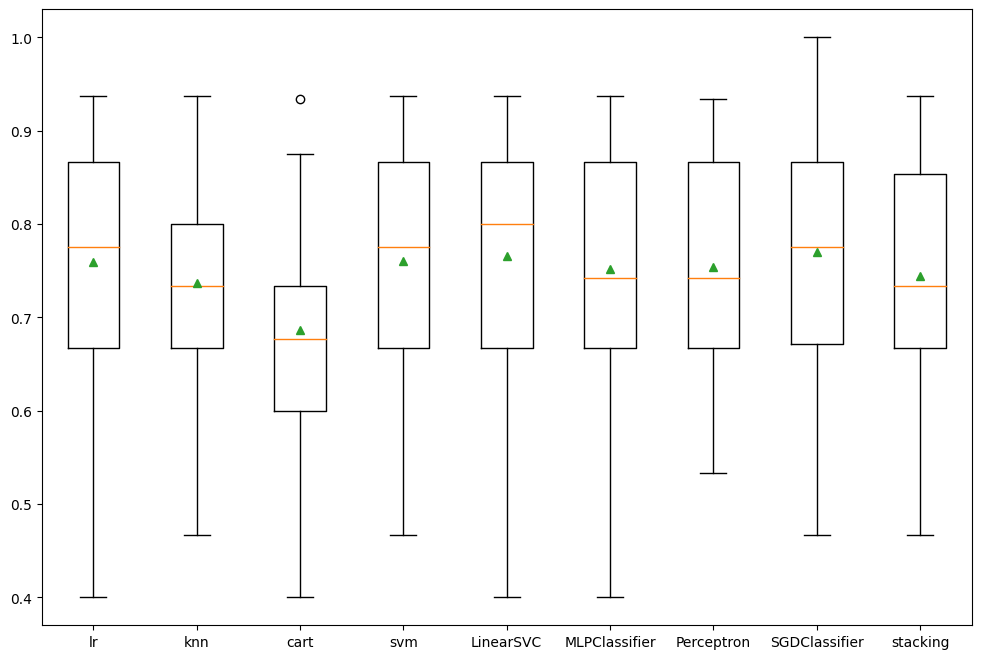

In [64]:
# boxplot of model performance
results_plot('boxplot', results , names)

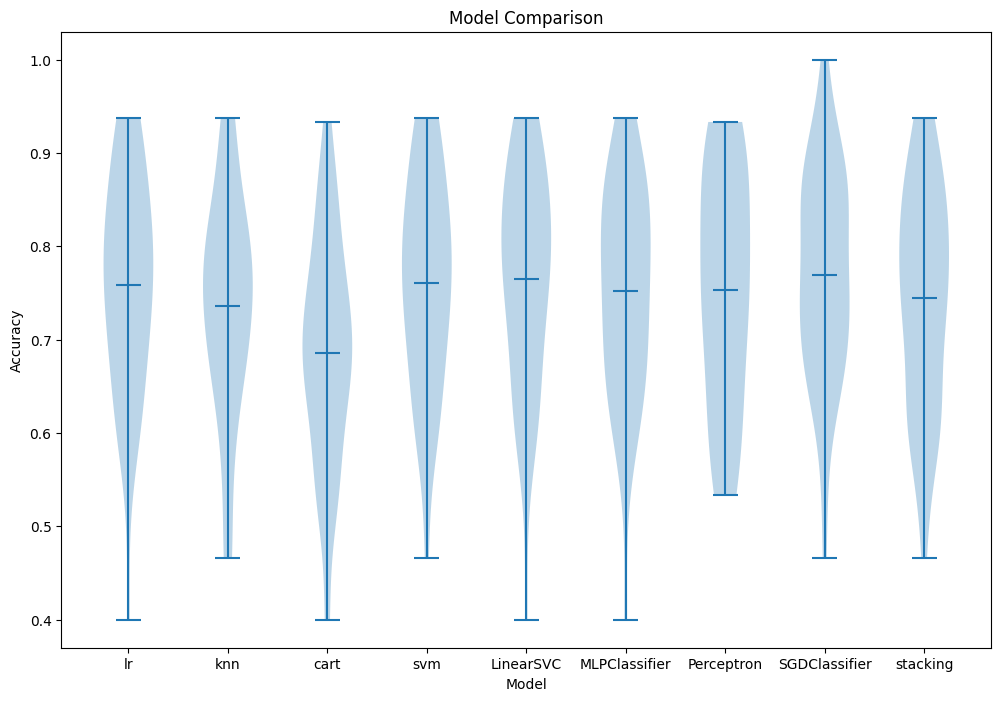

In [65]:
# violinplot of model performance
results_plot('violinplot', results , names)

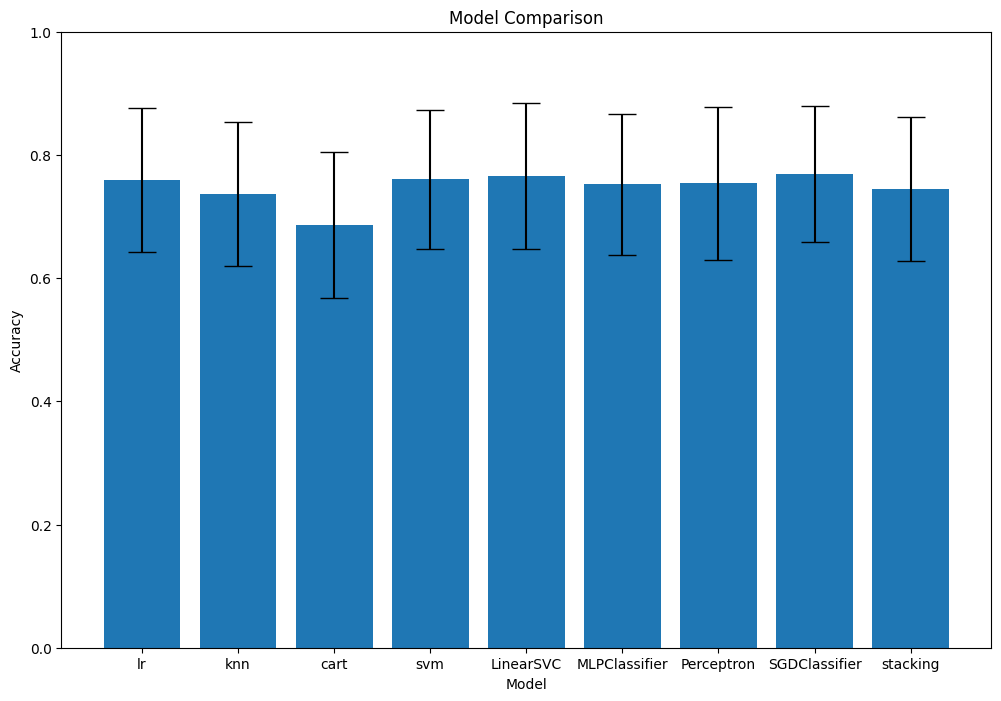

In [66]:
# barplot of model performance
results_plot('barplot', results , names)

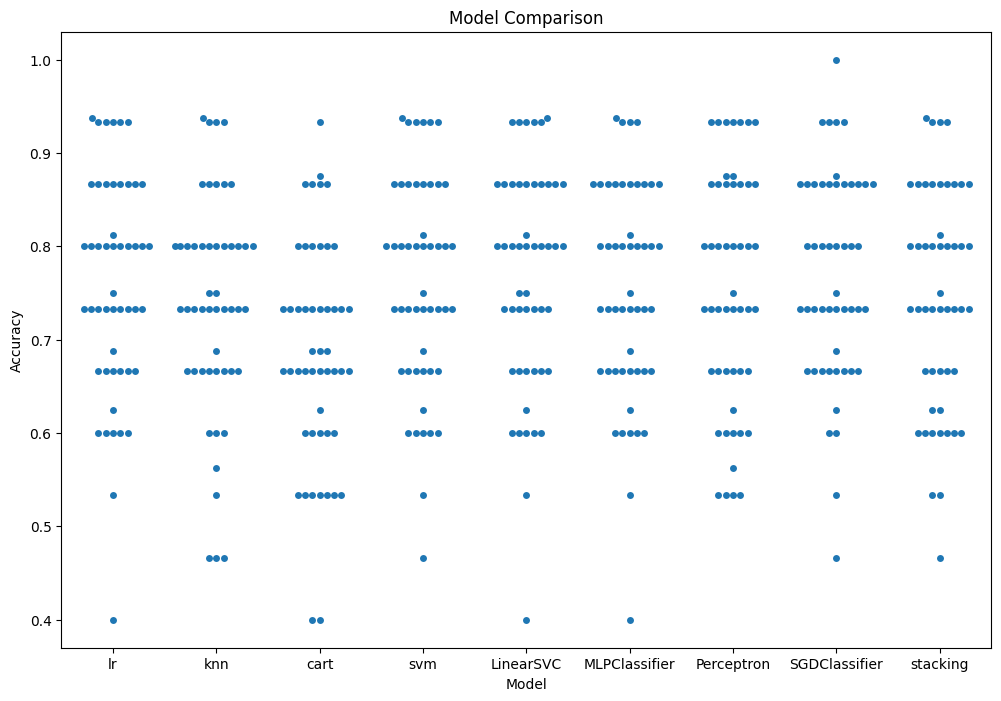

In [67]:
# swarmplot of model performance
results_plot('swarmplot', results , names)

Plot the confusion matrix for each model in the dictionary

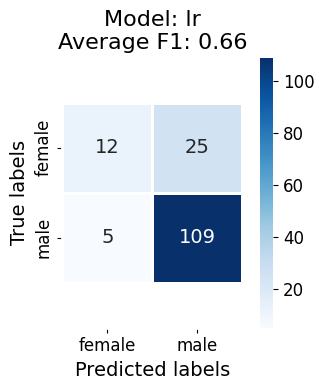

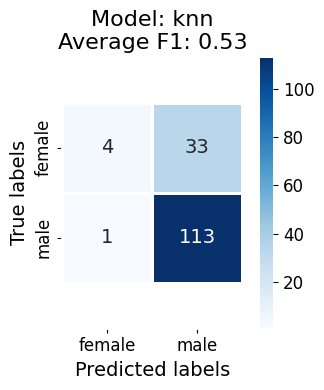

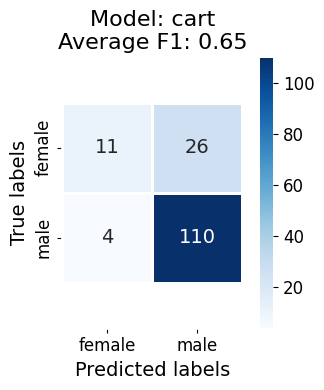

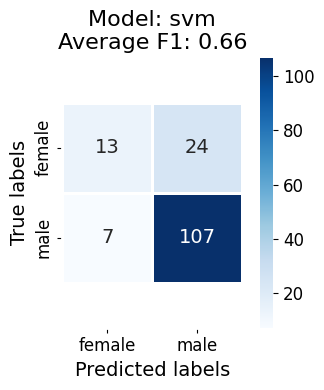

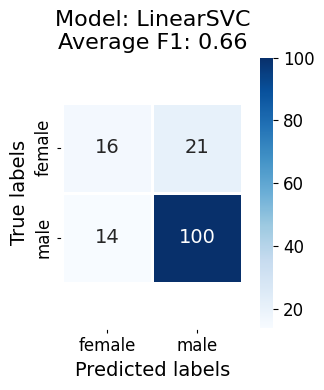

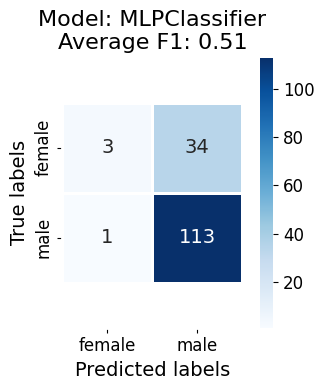

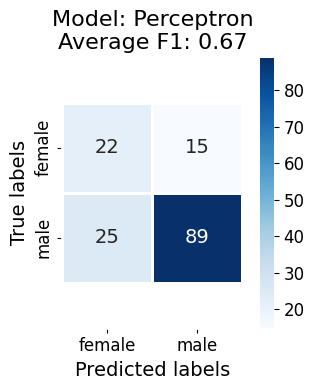

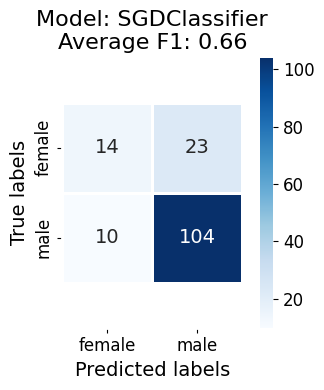

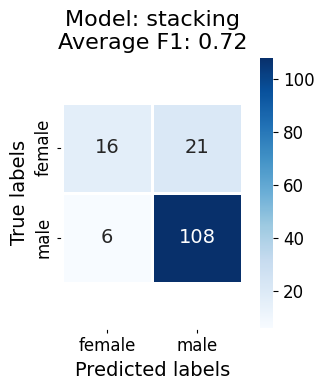

In [68]:
def plot_confusion_matrix(score):
    for mod in score:
        fig, ax = plt.subplots(figsize=(4, 4))

        sns.heatmap(score[mod]['Confusion Matrix'], annot=True, fmt='g', cmap='Blues', cbar=True,
                    annot_kws={'fontsize': 14}, ax=ax, square=True, linewidths=1, linecolor='white')

        ax.set_xlabel('Predicted labels', fontsize=14)
        ax.set_ylabel('True labels', fontsize=14)
        ax.set_xticklabels(['female', 'male'], fontsize=12)
        ax.set_yticklabels(['female', 'male'], fontsize=12)
        ax.set_title(f"Model: {mod}\nAverage F1: {score[mod]['average_f1']:.2f}", fontsize=16)
        
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)
        
        # Add a color bar
        cbar = ax.collections[0].colorbar
        cbar.ax.tick_params(labelsize=12)
        
        # Add a white grid
        for _, spine in ax.spines.items():
            spine.set_visible(True)
            spine.set_color('white')
            spine.set_linewidth(2)
        
        plt.tight_layout()
        plt.show()

plot_confusion_matrix(score)

This function sets the test data by reading a CSV file containing text data, cleaning the text, vectorizing it using either TfidfVectorizer or CountVectorizer (depending on the specified argument), performing feature selection using mutual_info_classif or chi2 (depending on the default argument), and scaling the data using MinMaxScaler. The function returns two objects: the original text data (stored in a pandas Series) and the scaled and transformed test data (stored as a numpy array).

In [69]:
data , test_data = set_test_data() # set the test data

The predict_test_data function takes the score dictionary as input, which contains information about the trained models and their performance. It then uses these trained models to predict the gender of the stories in the test dataset and creates a dataframe df_predict with the story and the predicted gender. This function returns a dictionary df_predict_dict where the keys are the model names and the values are the corresponding dataframes with predicted gender for each story in the test dataset.

In [70]:
# predict the test data
def predict_test_data(score):
    df_predict_dict = {} # dictionary of predictions
    
    for mod in score:
        y_pred = score[mod]['model'].predict(test_data) # predict the test data
        df_predict = pd.DataFrame({'story': data, 'predicted gender': y_pred}) # create a dataframe of the predictions
        print(f"-----Model {mod}------") # print the model name
        print(df_predict['predicted gender'].value_counts()) # print the number of male and female predictions
        print('-------------------')
        print("\n") 
        df_predict_dict[mod] = df_predict # store the predictions in a dictionary

    return df_predict_dict

Applying the trained models on the test data.
Then extract the predicted gender for the stacking model from df_predict_dict and assign it to df_predicted.

In [71]:
df_predict_dict = predict_test_data(score) # predict the test data
df_predicted = df_predict_dict['stacking'] # get the predictions of the stacking model

-----Model lr------
m    261
f     62
Name: predicted gender, dtype: int64
-------------------


-----Model knn------
m    323
Name: predicted gender, dtype: int64
-------------------


-----Model cart------
m    286
f     37
Name: predicted gender, dtype: int64
-------------------


-----Model svm------
m    276
f     47
Name: predicted gender, dtype: int64
-------------------


-----Model LinearSVC------
m    166
f    157
Name: predicted gender, dtype: int64
-------------------


-----Model MLPClassifier------
m    305
f     18
Name: predicted gender, dtype: int64
-------------------


-----Model Perceptron------
m    170
f    153
Name: predicted gender, dtype: int64
-------------------


-----Model SGDClassifier------
m    254
f     69
Name: predicted gender, dtype: int64
-------------------


-----Model stacking------
m    232
f     91
Name: predicted gender, dtype: int64
-------------------




### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [72]:
df_predicted.to_csv('classification_results.csv',index=False)